In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc

file_path = '/kaggle/input/common-voice/cv-valid-train.csv'

# Read the CSV file into a DataFrame
dftrain = pd.read_csv(file_path)
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195776 entries, 0 to 195775
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   filename    195776 non-null  object 
 1   text        195776 non-null  object 
 2   up_votes    195776 non-null  int64  
 3   down_votes  195776 non-null  int64  
 4   age         73768 non-null   object 
 5   gender      74059 non-null   object 
 6   accent      64711 non-null   object 
 7   duration    0 non-null       float64
dtypes: float64(1), int64(2), object(5)
memory usage: 11.9+ MB


In [2]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195776 entries, 0 to 195775
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   filename    195776 non-null  object 
 1   text        195776 non-null  object 
 2   up_votes    195776 non-null  int64  
 3   down_votes  195776 non-null  int64  
 4   age         73768 non-null   object 
 5   gender      74059 non-null   object 
 6   accent      64711 non-null   object 
 7   duration    0 non-null       float64
dtypes: float64(1), int64(2), object(5)
memory usage: 11.9+ MB


In [3]:
dftrain.tail()

,filename,text,up_votes,down_votes,age,gender,accent,duration
195771,cv-valid-train/sample-195771.mp3,the englishman said nothing,1,0,thirties,male,england,NaN
195772,cv-valid-train/sample-195772.mp3,the irish man sipped his tea,1,0,NaN,NaN,NaN,NaN
195773,cv-valid-train/sample-195773.mp3,what do you know about that,1,0,NaN,NaN,NaN,NaN
195774,cv-valid-train/sample-195774.mp3,the phone rang while she was awake,2,0,twenties,male,us,NaN
195775,cv-valid-train/sample-195775.mp3,among these people were a couple of cyclists a...,4,1,NaN,NaN,NaN,NaN


In [4]:
# Removing records where the "gender" column value is NaN
dftrain = dftrain.dropna(subset=['gender'])
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74059 entries, 5 to 195774
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   filename    74059 non-null  object 
 1   text        74059 non-null  object 
 2   up_votes    74059 non-null  int64  
 3   down_votes  74059 non-null  int64  
 4   age         73466 non-null  object 
 5   gender      74059 non-null  object 
 6   accent      63756 non-null  object 
 7   duration    0 non-null      float64
dtypes: float64(1), int64(2), object(5)
memory usage: 5.1+ MB


In [5]:
total_rows = len(dftrain)  # Total number of rows in the dataset
nan_count = dftrain['duration'].isna().sum()  # Number of NaN values in the duration column

print("Number of rows in 'duration' column:", nan_count)
print("Total number of rows in the dataset:", total_rows)

Number of rows in 'duration' column: 74059
Total number of rows in the dataset: 74059


In [6]:
nan_percentage = (nan_count / total_rows) * 100
print("Percentage of NaN values ​​in 'duration' column: {:.2f}%".format(nan_percentage))

Percentage of NaN values ​​in 'duration' column: 100.00%


In [7]:
df = dftrain.drop('duration', axis=1)
df.head()

,filename,text,up_votes,down_votes,age,gender,accent
5,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,twenties,female,us
8,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,seventies,male,us
13,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,thirties,female,us
14,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,sixties,male,england
19,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,fifties,male,australia


In [8]:
count_per_accent = df['accent'].value_counts()
print(count_per_accent)

accent
us                30321
england           14904
indian             4455
australia          4101
canada             3901
scotland           1556
newzealand         1153
african            1149
ireland             944
philippines         326
wales               262
bermuda             196
malaysia            182
singapore           124
hongkong             99
southatlandtic       83
Name: count, dtype: int64


In [9]:
df_filtered = df[(df['accent'] != 'southatlandtic') & (df['accent'] != 'hongkong') & (df['accent'] != 'bermuda') & (df['accent'] != 'singapore') & (df['accent'] != 'wales') & (df['accent'] != 'malaysia') & (df['accent'] != 'philippines') & (df['accent'] != 'ireland')]

df_filtered.info()
count_per_accent = df_filtered.groupby('accent').size()

print(count_per_accent)
print(df_filtered['accent'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 71843 entries, 5 to 195774
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    71843 non-null  object
 1   text        71843 non-null  object
 2   up_votes    71843 non-null  int64 
 3   down_votes  71843 non-null  int64 
 4   age         71258 non-null  object
 5   gender      71843 non-null  object
 6   accent      61540 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.4+ MB
accent
african        1149
australia      4101
canada         3901
england       14904
indian         4455
newzealand     1153
scotland       1556
us            30321
dtype: int64
['us' 'england' 'australia' 'indian' 'canada' nan 'scotland' 'african'
 'newzealand']


In [10]:
df_filtered = df_filtered.dropna(subset=['accent'])

In [11]:
print(df_filtered['accent'].unique())
df_filtered.info()

['us' 'england' 'australia' 'indian' 'canada' 'scotland' 'african'
 'newzealand']
<class 'pandas.core.frame.DataFrame'>
Index: 61540 entries, 5 to 195774
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    61540 non-null  object
 1   text        61540 non-null  object
 2   up_votes    61540 non-null  int64 
 3   down_votes  61540 non-null  int64 
 4   age         60955 non-null  object
 5   gender      61540 non-null  object
 6   accent      61540 non-null  object
dtypes: int64(2), object(5)
memory usage: 3.8+ MB


In [12]:
print(count_per_accent)

accent
african        1149
australia      4101
canada         3901
england       14904
indian         4455
newzealand     1153
scotland       1556
us            30321
dtype: int64


## Equalization by number of entries by gender

In [13]:
accent_afr_indices = df_filtered[df_filtered['accent'] == 'african'].index
random_indices_afr = np.random.choice(accent_afr_indices, size=149, replace=True)
df_filtered = df_filtered.drop(random_indices_afr)

accent_aust_indices = df_filtered[df_filtered['accent'] == 'australia'].index
random_indices_aust = np.random.choice(accent_aust_indices, size=3101, replace=True)
df_filtered = df_filtered.drop(random_indices_aust)

accent_can_indices = df_filtered[df_filtered['accent'] == 'canada'].index
random_indices_can = np.random.choice(accent_can_indices, size=2901, replace=False)
df_filtered = df_filtered.drop(random_indices_can)

accent_england_indices = df_filtered[df_filtered['accent'] == 'england'].index
random_indices_england = np.random.choice(accent_england_indices, size=13904, replace=False)
df_filtered = df_filtered.drop(random_indices_england)

accent_ind_indices = df_filtered[df_filtered['accent'] == 'indian'].index
random_indices_ind = np.random.choice(accent_ind_indices, size=3455, replace=False)
df_filtered = df_filtered.drop(random_indices_ind)

accent_nz_indices = df_filtered[df_filtered['accent'] == 'newzealand'].index
random_indices_nz = np.random.choice(accent_nz_indices, size=153, replace=False)
df_filtered = df_filtered.drop(random_indices_nz)

accent_scot_indices = df_filtered[df_filtered['accent'] == 'scotland'].index
random_indices_scot = np.random.choice(accent_scot_indices, size=556, replace=False)
df_filtered = df_filtered.drop(random_indices_scot)

accent_us_indices = df_filtered[df_filtered['accent'] == 'us'].index
random_indices_us = np.random.choice(accent_us_indices, size=29321, replace=False)
df_filtered = df_filtered.drop(random_indices_us)

count_per_accent_updated = df_filtered.groupby('accent').size()
print(count_per_accent_updated)

accent
african       1007
australia     1922
canada        1000
england       1000
indian        1000
newzealand    1000
scotland      1000
us            1000
dtype: int64


In [14]:
accent_afr_indices = df_filtered[df_filtered['accent'] == 'african'].index
random_indices_afr = np.random.choice(accent_afr_indices, size=8, replace=True)
df_filtered = df_filtered.drop(random_indices_afr)

accent_aust_indices = df_filtered[df_filtered['accent'] == 'australia'].index
random_indices_aust = np.random.choice(accent_aust_indices, size=936, replace=True)
df_filtered = df_filtered.drop(random_indices_aust)

count_per_accent_updated = df_filtered.groupby('accent').size()
print(count_per_accent_updated)

accent
african        999
australia     1208
canada        1000
england       1000
indian        1000
newzealand    1000
scotland      1000
us            1000
dtype: int64


In [15]:
accent_aust_indices = df_filtered[df_filtered['accent'] == 'australia'].index
random_indices_aust = np.random.choice(accent_aust_indices, size=216, replace=True)
df_filtered = df_filtered.drop(random_indices_aust)

count_per_accent_updated = df_filtered.groupby('accent').size()
print(count_per_accent_updated)

accent
african        999
australia     1013
canada        1000
england       1000
indian        1000
newzealand    1000
scotland      1000
us            1000
dtype: int64


## Removing the US accent (further work with df without us)

In [16]:
df_filtered_without_us = df_filtered.copy()

df_filtered_without_us = df_filtered_without_us[df_filtered_without_us['accent'] != 'us']

us_files = df_filtered[df_filtered['accent'] == 'us']['filename'].tolist()

df_filtered_without_us['filename'] = df_filtered_without_us['filename'].apply(lambda x: x if x not in us_files else None)
df_filtered_without_us = df_filtered_without_us.dropna(subset=['filename'])

df_filtered_without_us.head()

,filename,text,up_votes,down_votes,age,gender,accent
26,cv-valid-train/sample-000026.mp3,two years ago right here on this spot i had a ...,4,0,twenties,female,australia
36,cv-valid-train/sample-000036.mp3,ask the owner of that stall how much the sword...,2,1,twenties,male,australia
68,cv-valid-train/sample-000068.mp3,the flock of flamingos landed gracefully on th...,1,0,twenties,male,indian
92,cv-valid-train/sample-000092.mp3,who is this stranger who speaks of omens asked...,3,0,twenties,male,indian
100,cv-valid-train/sample-000100.mp3,half an hour later his shovel hit something solid,3,0,fourties,male,england


In [17]:
count_per_accent_without_us = df_filtered_without_us.groupby('accent').size()
print(count_per_accent_without_us)

accent
african        999
australia     1013
canada        1000
england       1000
indian        1000
newzealand    1000
scotland      1000
dtype: int64


In [18]:
gender_counts = df_filtered_without_us['gender'].value_counts()

print("Number of entries by gender:")
print(gender_counts)

Number of entries by gender:
gender
male      5111
female    1833
other       68
Name: count, dtype: int64


In [19]:
# Deleting all entries with gender 'other'
df_filtered_without_other = df_filtered_without_us.loc[df_filtered_without_us['gender'] != 'other']

gender_counts_cleaned = df_filtered_without_other['gender'].value_counts()

print("Number of records by gender after removing 'other':")
print(gender_counts_cleaned)

Number of records by gender after removing 'other':
gender
male      5111
female    1833
Name: count, dtype: int64


In [20]:
# Removing the first 3500 male entries# 
df_filtered_without_male = df_filtered_without_other.drop(df_filtered_without_other[df_filtered_without_other['gender'] == 'male'].head(3300).index)

# Checking the number of records by gender after removing the male gender
gender_counts_cleaned = df_filtered_without_male['gender'].value_counts()
print("Number of records by gender after removing 3,500 male records:")
print(gender_counts_cleaned)

Number of records by gender after removing 3,500 male records:
gender
female    1833
male      1811
Name: count, dtype: int64


## CALCULATION OF SPECTOGRAMS

In [21]:
import os
from sklearn.model_selection import train_test_split
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [22]:
audio_dir = '/kaggle/input/common-voice/cv-valid-train'

def create_spectrogram(file_path, num_mel_bins=128, max_time_steps=128):
    full_path = os.path.join(audio_dir, file_path)
    audio, sr = librosa.load(full_path, sr=None)
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    padded_spectrogram = np.zeros((num_mel_bins, max_time_steps))
    padded_spectrogram[:min(spectrogram_db.shape[0], num_mel_bins), :min(spectrogram_db.shape[1], max_time_steps)] = spectrogram_db[:min(spectrogram_db.shape[0], num_mel_bins), :min(spectrogram_db.shape[1], max_time_steps)]
    return padded_spectrogram

file_paths = df_filtered_without_male['filename'].tolist()
genders = df_filtered_without_male['gender'].tolist()

print(os.path.join(audio_dir, file_paths[0]))  # Example path to the first audio file

/kaggle/input/common-voice/cv-valid-train/cv-valid-train/sample-000026.mp3


In [23]:
# Dividing data into training and test sets
X_train_paths, X_test_paths, y_train, y_test = train_test_split(file_paths, genders, test_size=0.2, random_state=42)

In [24]:
# Creating spectrograms for a test data set
X_train = []
for file_path in X_train_paths:
    spectrogram = create_spectrogram(file_path)
    X_train.append(spectrogram)
X_train = np.array(X_train)

print("X_train array dimensions (num_samples, num_mel_bins, max_time_steps):", X_train.shape)

X_train array dimensions (num_samples, num_mel_bins, max_time_steps): (2915, 128, 128)


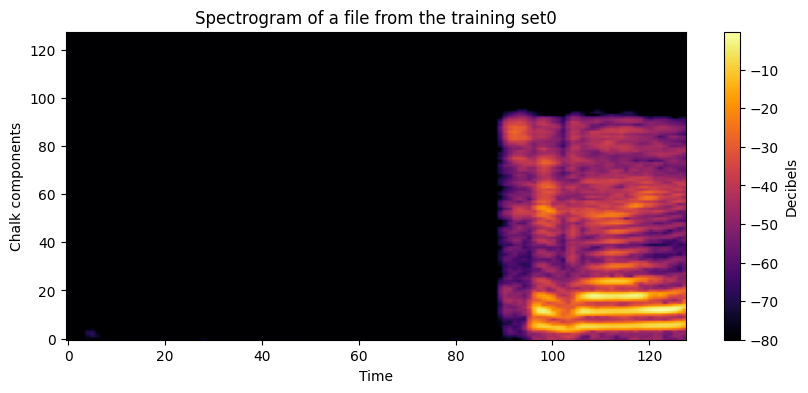

In [25]:
file_index = 0

# Output spectrogram of the selected file
plt.figure(figsize=(10, 4))
plt.imshow(X_train[file_index], origin='lower', aspect='auto', cmap='inferno')
plt.title('Spectrogram of a file from the training set{}'.format(file_index))
plt.xlabel('Time')
plt.ylabel('Chalk components')
plt.colorbar(label='Decibels')
plt.show()

In [26]:
# Creating spectrograms for a test data set
X_test = []
for file_path in X_test_paths:
    spectrogram = create_spectrogram(file_path)
    X_test.append(spectrogram)
X_test = np.array(X_test)

print("X_test array sizes (num_samples, num_mel_bins, max_time_steps):", X_test.shape)

X_test array sizes (num_samples, num_mel_bins, max_time_steps): (729, 128, 128)


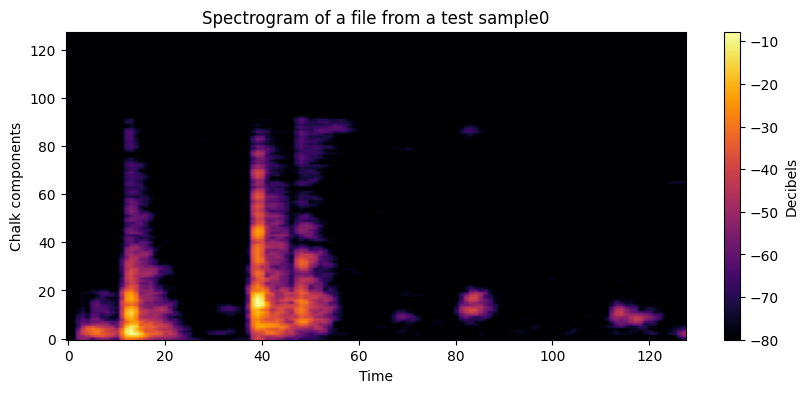

In [27]:
file_index = 0

# Output spectrogram of the selected file
plt.figure(figsize=(10, 4))
plt.imshow(X_test[file_index], origin='lower', aspect='auto', cmap='inferno')
plt.title('Spectrogram of a file from a test sample{}'.format(file_index))
plt.xlabel('Time')
plt.ylabel('Chalk components')
plt.colorbar(label='Decibels')
plt.show()

In [28]:
# Convert gender labels to numeric format
label_dict = {'male': 0, 'female': 1}
y_train = np.array([label_dict[gender] for gender in y_train])
y_test = np.array([label_dict[gender] for gender in y_test])

print("Gender labels in numeric format for training dataset:")
print(y_train)

print("\nGender labels in numeric format for test dataset:")
print(y_test)

Gender labels in numeric format for training dataset:
[1 0 0 ... 1 0 0]

Gender labels in numeric format for test dataset:
[1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1
 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0
 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1
 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0
 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1
 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1
 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0

## Model for sex determination using spectograms

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.utils import class_weight
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam


num_mel_bins = 128
max_time_steps = 128

input_shape = (num_mel_bins, max_time_steps, 1)

# Calculating class weights
# class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)


# Convert to dictionary for transfer to fit
# class_weight_dict = dict(enumerate(class_weights))

# Creating a model
model_gender = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.005)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.005)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.005)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.005)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model_gender.summary()
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)


model_gender.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

num_epochs = 60
batch_size = 32
history = model_gender.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, 
                    validation_data=(X_test, y_test), verbose=1)

2024-07-23 07:20:12.168362: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 07:20:12.168463: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 07:20:12.454498: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
 7/92 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4843 - loss: 6.6238

I0000 00:00:1721719239.407930     135 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721719239.430723     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5427 - loss: 3.5072

W0000 00:00:1721719245.286637     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 79ms/step - accuracy: 0.5434 - loss: 3.4962 - val_accuracy: 0.7833 - val_loss: 1.6751
Epoch 2/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8034 - loss: 1.5667 - val_accuracy: 0.8834 - val_loss: 1.3108
Epoch 3/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8586 - loss: 1.3251 - val_accuracy: 0.8820 - val_loss: 1.2273
Epoch 4/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8945 - loss: 1.1795 - val_accuracy: 0.8875 - val_loss: 1.1334
Epoch 5/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9049 - loss: 1.0933 - val_accuracy: 0.8765 - val_loss: 1.1037
Epoch 6/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9151 - loss: 1.0195 - val_accuracy: 0.8793 - val_loss: 1.0641
Epoch 7/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9381 - loss: 0.9568 - val_accuracy: 0.9246 - val_loss: 0.9706
Epoch 8/60
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9282 - loss: 0.9267 - val_accuracy: 0.8957 - val_loss: 0

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9224 - loss: 0.4955
Точность на тестовом наборе данных: 0.9190672039985657


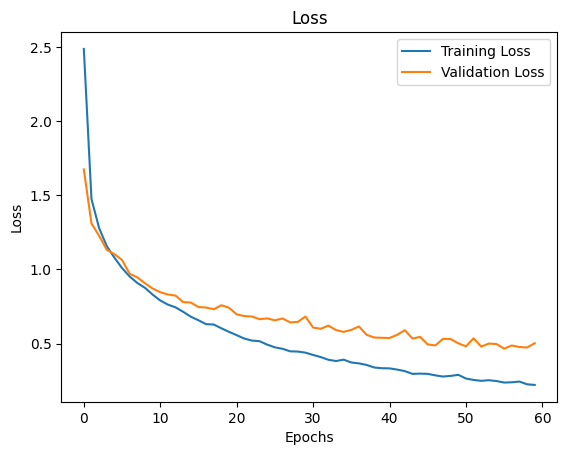

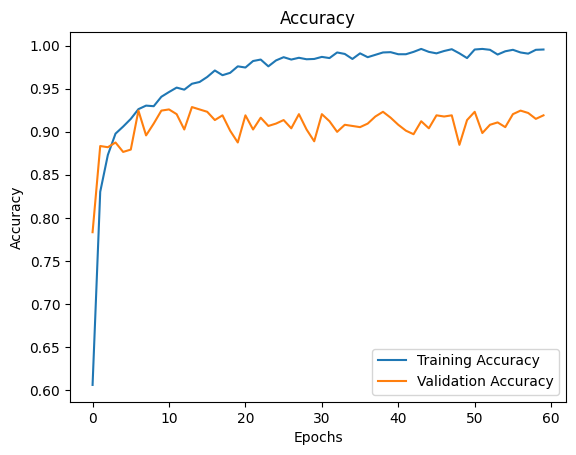

In [30]:
# Model performance evaluation
score_gender = model_gender.evaluate(X_test, y_test)
print("Точность на тестовом наборе данных:", score_gender[1])

# Loss function and accuracy plots
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Moswl Saving

In [37]:
model_gender.save('Speech_Gender_Detection_Model_v1.0.h5')

In [38]:
y_pred = model_gender.predict(X_test[:20])
y_pred_classes = (y_pred > 0.5).astype(int)

gender_labels = {0: 'male', 1: 'female'}
y_test_labels = [gender_labels[label] for label in y_test[:20]]
y_pred_labels = [gender_labels[label] for label in y_pred_classes.flatten()]

for i in range(20):
    print("Real gender:", y_test_labels[i], "Predicted gender:", y_pred_labels[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Real gender: female Predicted gender: female
Real gender: male Predicted gender: male
Real gender: male Predicted gender: male
Real gender: female Predicted gender: female
Real gender: male Predicted gender: male
Real gender: male Predicted gender: male
Real gender: female Predicted gender: female
Real gender: male Predicted gender: male
Real gender: female Predicted gender: female
Real gender: male Predicted gender: male
Real gender: female Predicted gender: female
Real gender: male Predicted gender: male
Real gender: female Predicted gender: female
Real gender: male Predicted gender: male
Real gender: male Predicted gender: male
Real gender: female Predicted gender: female
Real gender: male Predicted gender: male
Real gender: female Predicted gender: female
Real gender: female Predicted gender: female
Real gender: male Predicted gender: male


In [39]:
print("y_test[:30]:", y_test[:30])
print("y_pred_classes:", y_pred_classes)
print("y_test_labels:", y_test_labels)
print("y_pred_labels:", y_pred_labels)

y_test[:30]: [1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1]
y_pred_classes: [[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]
y_test_labels: ['female', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'male', 'female', 'male', 'female', 'female', 'male']
y_pred_labels: ['female', 'male', 'male', 'female', 'male', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'male', 'female', 'male', 'female', 'female', 'male']
